In [1]:
import numpy as np
import  pandas as pd

In [89]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")
df['v2'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

### Steps 
1 Cleaning
2 EDA
3 Text Preprocessing
4 Model Buolding
5 Evaluation
6 Imporvement
7 website
8 Deploy

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#Droping  column 2, 3, 4
df.drop(columns=["Unnamed: 2", "Unnamed: 3", 'Unnamed: 4'], inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
#renaming the columns
df.rename(columns={'v1':'target', 'v2':"text"}, inplace = True)

In [6]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder= LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#Checking suplicates
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep='first', inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

## 2. EDA

In [15]:
#Finding   how much data is ham/spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x23d6b50fb10>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

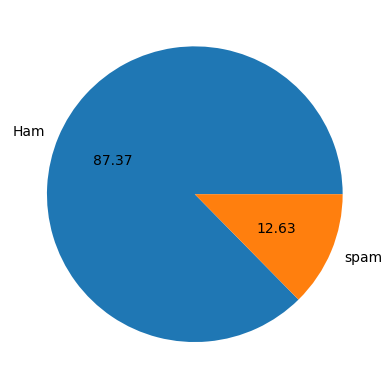

In [17]:
plt.pie(df['target'].value_counts(), labels=["Ham","spam"], autopct="%0.2f")

In [18]:
#Data is imbalance

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [22]:
df["num_character"] = df['text'].apply(len)

In [23]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [24]:
#num of words 
# Word tokenisation :- breaking the sms in to list of words and storing it into the list
df['text'].apply(lambda x:nltk.word_tokenize(x))

#counting the number of words in the above list
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#Sent_tokenize: breaking the paragraph on the basis of sentence in to a list
df['text'].apply(lambda x:nltk.sent_tokenize(x))

#Counting number of sentances and storing in the list
df["num_sentances"] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [27]:
df.head()

,target,text,num_character,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
#filtering Ham msg
#describing the ham for imsight
df[df['target']==0][['num_character', 'num_words', 'num_sentances']].describe()

,num_character,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#filtering spam msg
#describing the spam for imsight
df[df['target']==1][['num_character', 'num_words', 'num_sentances']].describe()

,num_character,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
#from above two cell we can clearly see that spam msg are bigger as compare to the ham msg

In [31]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

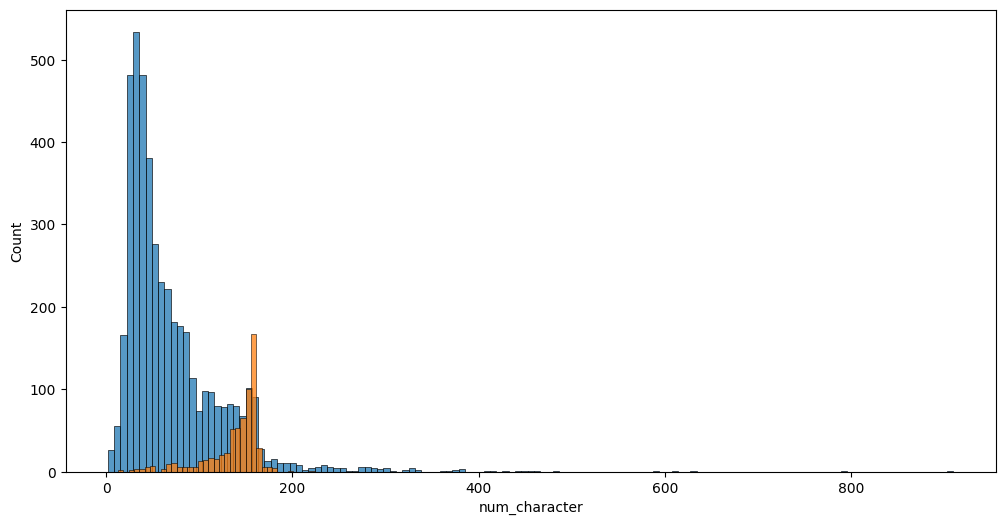

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'])

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


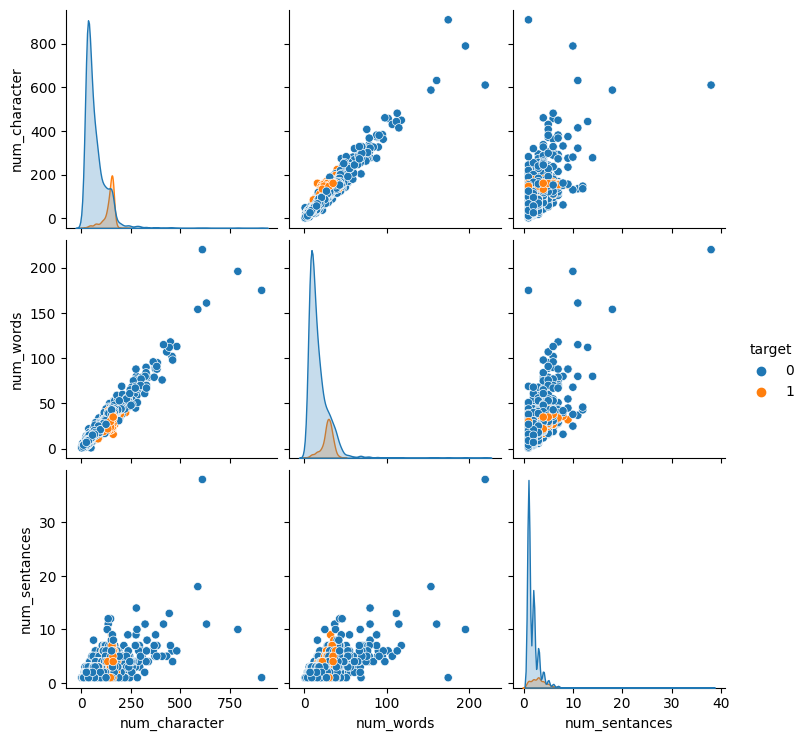

In [33]:
# Find the corellation between different input

sns.pairplot(df, hue='target')

In [34]:
df[['num_character', "num_words", "num_sentances"]].corr()

,num_character,num_words,num_sentances
num_character,1.000000,0.965760,0.624139
num_words,0.965760,1.000000,0.679971
num_sentances,0.624139,0.679971,1.000000


<Axes: >

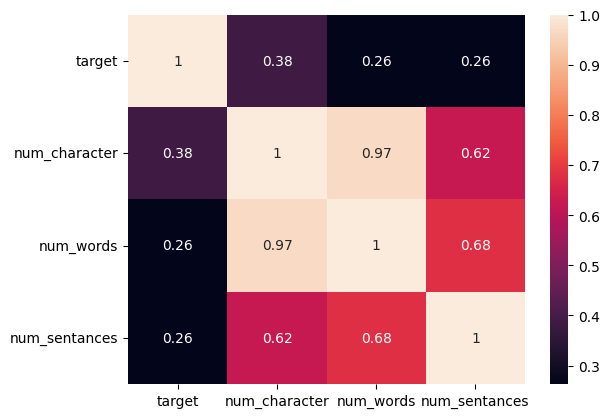

In [35]:
#creating heatmap to see the corelation  between different features
sns.heatmap(df[["target", 'num_character', "num_words", "num_sentances"]].corr(), annot=True)

In [36]:
# since num_character, num_word, num_sentance has high corelation amongs it self therefore we have to choose only one column
# the column we will choose is num_character as it has maximum relation with target column as compare to the num_words and num_sentance

## 3. Data Preprocessing

    * Lower case
    * Tokenization
    * Removing Special characters
    * Removing stop words and Punctuation
    * Steming


### Making a function with name transform text to apply all the above steps in the single go



In [37]:
# Importing stopwords library from nltk and view aal the stopwords from english

from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
# Viewing Punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dancing")

'danc'

In [40]:

def transform_text(text):

    # lower casing all the words
    text = text.lower()

    # making breaking the word and storing these words into a list
    text = nltk.word_tokenize(text)

    #keeping only digit and alphabates
    y=[]
    for i in text:          
        if i.isalnum():     
            y.append(i)

    text = y[:]
    y.clear()

    #Removing Stopwords and Punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    #Stemmig all the word( bringing them to root words)
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [41]:
transform_text("I loved the Youtube Lectures on Machine learning. How ablout you?")

'love youtub lectur machin learn ablout'

In [42]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [43]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [44]:
df['transformed_text']=df['text'].apply(transform_text)

In [45]:
df

,target,text,num_character,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


### Word cloud for Spam

In [46]:
# Making 'word clouds' : word cloud will be make the important word big of ham and spam

from wordcloud import WordCloud
wc = WordCloud(width = 500, height= 500, min_font_size=10, background_color='white')

In [47]:
#Filtering spam rows and concanating word in the transfomed text with space(" ")
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

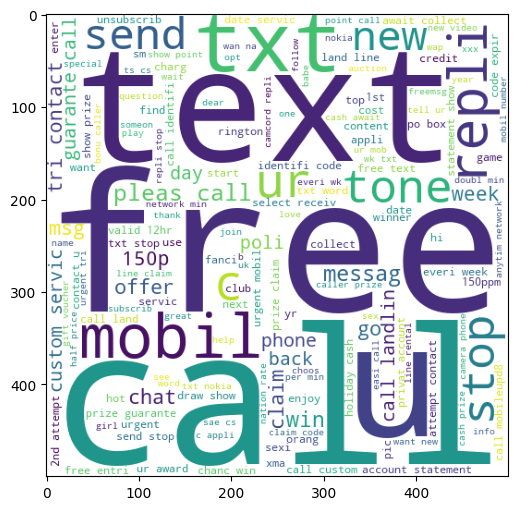

In [48]:
plt.figure(figsize=(6,6))
plt.imshow(spam_wc)

### Word cloud for Ham

In [49]:
#Filtering Ham rows and concanating word in the transfomed text with space(" ")
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

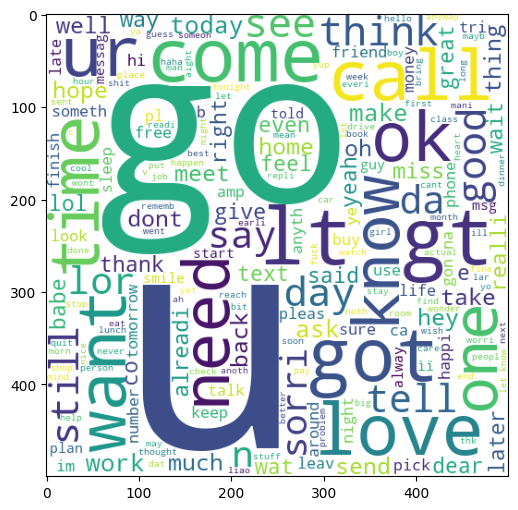

In [50]:
plt.figure(figsize=(6,6))
plt.imshow(spam_wc)

### Top 30 Words of Ham and Spam

In [51]:
df

,target,text,num_character,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [52]:
# Collocting all the words of transformed text which are in spam into a list
spam_corpus = []

for msg in  df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [53]:
# No. of words in spam
len(spam_corpus)

9939

In [54]:
# Creating a dictionary with the help of library called counter imported from collections
# this dictionary will tell word present in the list (as keys) and frequency of the word in the list (as value of key) 
from collections import Counter
Counter(spam_corpus).most_common(30) #it will append most common 30 words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

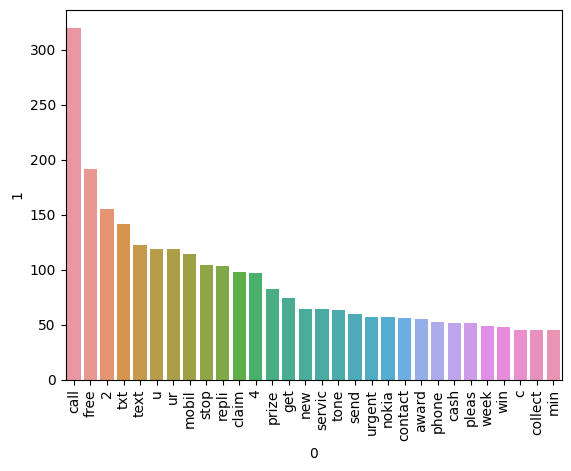

In [55]:
# making datafram with mostcommon 30 words
# ploting them of barchart
pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
# Collocting all the words of transformed text which are in Ham into a list
ham_corpus = []

for msg in  df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
# No. of words in ham
len(ham_corpus)

35404

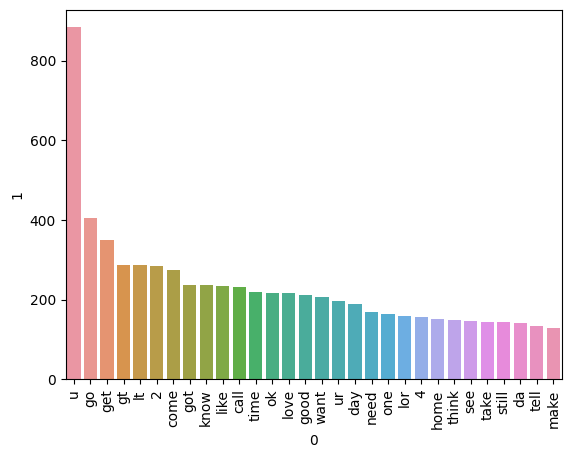

In [58]:
# making datafram with mostcommon 30 words
# ploting them of barchart
pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

This data is imbalance so here accuracy will not give the correct picture, we have to check precision score

Any ml algorith will need input/ output in numerical form
we can use bag of words-make column of most frequent words and check in the inputs how many times the words in the input columns are from bag of words


In [59]:
# Library name of bag of words is ContVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000) # we have checked for different values of no of features and 3000 feature is giving best result

### using countvectorizer

In [60]:
x = cv.fit_transform(df['transformed_text']).toarray()  #cv will give sparse array , by using to array function we are convertng it to tense array
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
x.shape     #(no of sms, no of words)

(5169, 6708)

In [62]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split


In [64]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state= 2 )

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [66]:
gnb=GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [67]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

Accuracy Score:  0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [68]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

Accuracy Score:  0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [69]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

Accuracy Score:  0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### Using tfidf

In [70]:
x = tfidf.fit_transform(df['transformed_text']).toarray()  #cv will give sparse array , by using to array function we are convertng it to tense array
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
x.shape     #(no of sms, no of words)

(5169, 3000)

In [72]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state= 2 )


In [74]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [75]:
gnb=GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [76]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

Accuracy Score:  0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [77]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

Accuracy Score:  0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [78]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

Accuracy Score:  0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


We will choose MNB with tfidf as for imbalance data precision is more important then accuracy

### testing other models

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [81]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [82]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [83]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703


KeyboardInterrupt: 

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [85]:
import pickle 

pickle.dump(mnb, open('mnb_model.pkl', 'wb'))

In [86]:
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", 'wb'))

In [1]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True